0.7172475797543516
1.0
0.2827524202456484
0.9672396370011208


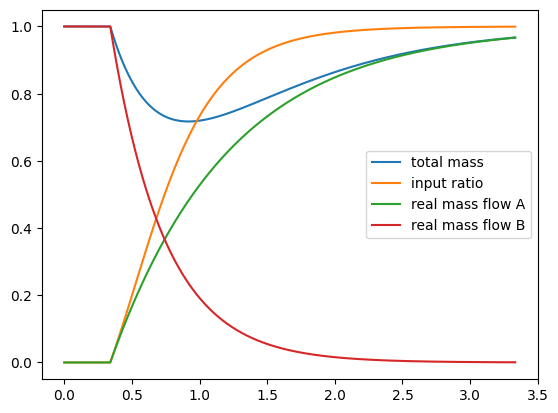

In [72]:
import numpy as np
import matplotlib.pyplot as plt

level_1 = 0
level_2 = 1
length_track = 40
scan_speed = 12
signal1_offset = -1.2
signal2_offset = -1.1
t_tot = length_track/scan_speed
time_steps = 5000
mass_flow = 9.2

#rise parameters
tau_rise = 0.88
del_rise = 1.54 + signal1_offset
#drop parameters
tau_drop = 0.4
del_drop = 1.44 + signal2_offset

time = np.linspace(0,t_tot, time_steps, endpoint = True)
drop_ind = (np.abs(time - del_drop)).argmin()
rise_ind = (np.abs(time - del_rise)).argmin()
if level_1 < level_2:
    mat_A = np.exp(-((time - del_rise)/tau_rise))*level_1 + (1 - np.exp(-((time - del_rise)/tau_rise)))*level_2
    mat_A[:rise_ind] = level_1
    mat_B = np.exp(-((time-del_drop)/tau_drop))*(1-level_1) + (1 - np.exp(-((time-del_drop)/tau_drop)))*(1-level_2)
    mat_B[:drop_ind] = (1-level_1)
else:
    mat_A = np.exp(-((time-del_drop)/tau_drop))*level_1 + (1 - np.exp(-((time-del_drop)/tau_drop)))*level_2
    mat_A[:drop_ind] = level_1
    mat_B = np.exp(-((time-del_rise)/tau_rise))*(1-level_1) + (1 - np.exp(-((time-del_rise)/tau_rise)))*(1-level_2)
    mat_B[:rise_ind] = (1-level_1)



plt.plot(time, (mat_A+mat_B))
plt.plot(time,mat_A/(mat_A+mat_B))
plt.plot(time,mat_A)
plt.plot(time,mat_B)
plt.legend(['total mass','input ratio','real mass flow A','real mass flow B'])
print(np.min(mat_A+mat_B))
print(np.max(mat_A+mat_B))
print(np.max(mat_A+mat_B) - np.min(mat_A+mat_B))
print((mat_A+mat_B)[-1])